## Salary Prediction Using Linear Regression Model (OLS Method)

In [137]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from  sklearn.metrics import r2_score


## Understanding the data

In [139]:
data = pd.read_csv("Salary_Data.csv")

In [140]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [141]:
data.shape

(30, 2)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [143]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


##  Visualizing the data

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

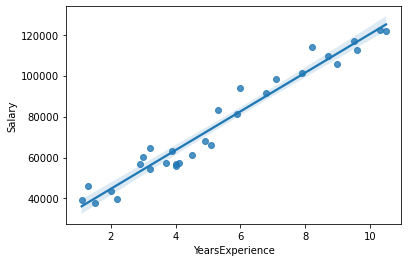

In [144]:
sns.regplot(x=data.YearsExperience,y=data.Salary)

In [145]:
## Cheking for correlation
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

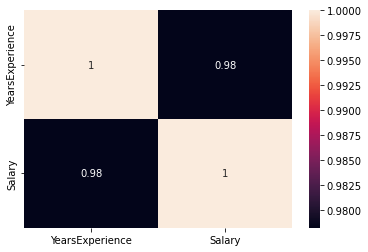

In [146]:
sns.heatmap(data.corr(),annot=True)

- <b> highly correlated 

## Splitting the data into train test

In [147]:
X = data.YearsExperience
y = data.Salary

In [148]:
X.head() , y.head()

(0    1.1
 1    1.3
 2    1.5
 3    2.0
 4    2.2
 Name: YearsExperience, dtype: float64,
 0    39343.0
 1    46205.0
 2    37731.0
 3    43525.0
 4    39891.0
 Name: Salary, dtype: float64)

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [150]:
X_train.shape , y_test.shape

((21,), (9,))

In [151]:
## Since we are using statsmodels here, we are adding a constant in X_train and y_train
X_train_sm = sm.add_constant(X_train)
print(X_train_sm.shape)
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(21, 2)


(9, 2)

In [152]:
## Creating Linear Regression Object
lr = sm.OLS(y_train,X_train_sm)
# fitting the model
lr_model = lr.fit()

In [153]:
#Checking the parameters
lr_model.params

const              25918.438335
YearsExperience     9339.081724
dtype: float64

In [166]:
# Y = mx + b
# m ( intercept / constant ) = 25918.43
# b ( slope ) = 9339.08

In [155]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     427.6
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.74e-14
Time:                        23:15:12   Log-Likelihood:                -210.19
No. Observations:                  21   AIC:                             424.4
Df Residuals:                      19   BIC:                             426.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.592e+04   2507.522     10.336      0.000    2.07e+04    3.12e+04
YearsExperience  9339.0817    451.653     20.678      0.000    8393.761    1.03e+04
==============================================================================
Omnibus:                        0.532   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.625
Skew:                           0.281   Prob(JB):                        0.732
Kurtosis:                       2.368   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- <b> R2 is 95.7 means around 96% of the salary is explained by the variable YearsExperience
- <b> p-value is also zero means the beta coef is significant

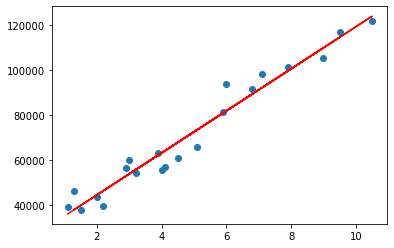

In [156]:
# Plotting a linear line using the equation y = mx + b
plt.scatter(X_train,y_train)
plt.plot(X_train,9339 * X_train + 25918.4,"r")
plt.show()

## Residual Analysis

In [157]:
# Predicting the train data
y_train_pred = lr_model.predict(X_train_sm)
residual = (y_train - y_train_pred)


<font color = 'green' ><b> # 1. Assumption of Linear regression model is residuals should follow a normal distribution <br># 2. residuals should be independent of each other.</b></font>

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


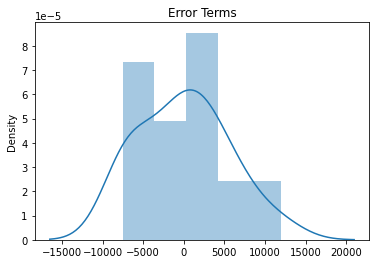

In [159]:
# Creating the histogram to check the distribution of the residuals
sns.distplot(residual,bins = 5)
plt.title("Error Terms")
plt.show()

- <b> Clearly above graph is showing normal distribution 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

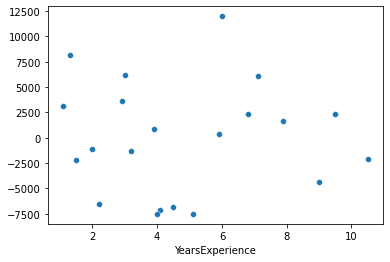

In [160]:
# Creating the scatter plot to check if the error terms or residuals follow any kind of pattern or independent
sns.scatterplot(X_train,residual)


- <b> Above graph is showing that the error terms are independing of each other

## Predictions on the Test Set

In [161]:
y_test_pred = lr_model.predict(X_test_sm)

In [162]:
y_test_pred.head()

27    115573.622884
15     71679.938782
23    102498.908470
17     75415.571471
8      55803.499851
dtype: float64

## Calculating R-square value on test data

In [163]:
r2_score(y_test,y_test_pred)

0.9414466227178215

## Visualizing the fit on the test set

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


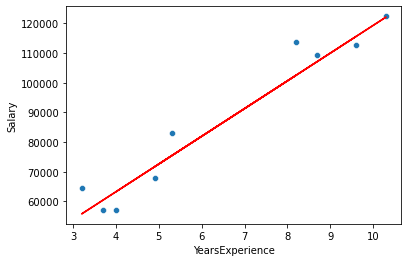

In [164]:
sns.scatterplot(X_test,y_test)
plt.plot(X_test , 9339 * X_test + 25918.4,"r" )
plt.show()